# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

# Table of Contents

1. <font size="3.5">[Prologue: an atomistic view of electrical resistance](#first-chapter)<br></font>
    1.1. [Energy level diagram](#1.1)<br>
    1.3. [The quantum of conductance](#1.3)<br>
    1.4. [Potential profile](#1.4)<br>
    1.5. [Coulomb blockade](#1.5)<br>
    1.E. [Exercises](#1.E)<br>
    [_References_](#references)<br>

***

# 1. Prologue: an atomistic view of electrical resistance <a id="first-chapter"></a>

## <font color = "navy" >1.1 Energy level diagram </font> <a id="1.1"></a>

<font color = "olive"> <u> 
- Previous variables are killed and a fresh start is conducted.</u> </font>

In [1]:
%reset -f
%matplotlib inline
from pylab import *

In [5]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; eps0=8.854e-12; epsr=4; m=0.25*9.11e-31 #Effective mass
I0=q*q/hbar;

#Parameters
W=1e-6; L=10e-9; t=1.5e-9; #W=Width, L=Length of active region, t=oxide thickness
Cg=epsr*eps0*W*L/t; Cs=0.05*Cg; Cd=0.05*Cg; CE=Cg+Cs+Cd; U0=q/CE;
alphag=Cg/CE; alphad=Cd/CE;
kT=0.025; mu=0; ep=0.2; v=1e5; #escape velocity
g1=hbar*v/(q*L); g2=g1; g=g1+g2;

#Energy grid
NE=501; E=linspace(-1,1,NE); dE=E[1]-E[0];
D0=m*q*W*L/(pi*hbar*hbar); #Step Density of states per eV
D=D0*hstack((zeros((251)),ones((250))));

#Reference number of electrons
f0=1/(1+exp((E+ep-mu)/kT)); N0=2*dE*sum(D*f0); ns=N0/(L*W*1e4) # /cm^2

#Bias
IV=61; VV=linspace(0,0.6,IV);

#Initializing arrays
N=zeros((IV)); I1=zeros((IV)); I2=zeros((IV)); I3=zeros((IV)); I4=zeros((IV));

#Fig.1.1.1 (a)
for iV in range(0,IV):
    Vd=0.025; Vg=VV[iV]; mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    dU=1; U=0; #Self-consistent field
    while dU>1e-6:
        f1=1/(1+exp((E+UL+U+ep-mu1)/kT)); f2=1/(1+exp((E+UL+U+ep-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew); U=U+0.1*(Unew-U);
    I1[iV]=dE*I0*(sum(D*(f1-f2)))*g1*g2/g;   
for iV in range(0,IV):
    Vd=0.5; Vg=VV[iV]; mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    dU=1; U=0; #Self-consistent field
    while dU>1e-6:
        f1=1/(1+exp((E+UL+U+ep-mu1)/kT)); f2=1/(1+exp((E+UL+U+ep-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew); U=U+0.1*(Unew-U);
    I2[iV]=dE*I0*(sum(D*(f1-f2)))*g1*g2/g;

#Fig.1.1.1 (b)
for iV in range(0,IV):
    Vg=0.25; Vd=VV[iV]; mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    dU=1; U=0; #Self-consistent field
    while dU>1e-6:
        f1=1/(1+exp((E+UL+U+ep-mu1)/kT)); f2=1/(1+exp((E+UL+U+ep-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew); U=U+0.1*(Unew-U);
    I3[iV]=dE*I0*(sum(D*(f1-f2)))*g1*g2/g;
for iV in range(0,IV):
    Vg=0.5; Vd=VV[iV]; mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    dU=1; U=0; #Self-consistent field
    while dU>1e-6:
        f1=1/(1+exp((E+UL+U+ep-mu1)/kT)); f2=1/(1+exp((E+UL+U+ep-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew); U=U+0.1*(Unew-U);
    I4[iV]=dE*I0*(sum(D*(f1-f2)))*g1*g2/g;

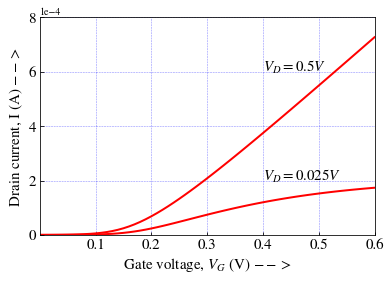

In [6]:
rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plot(VV,I1,'r',lw=2)
plot(VV,I2,'r',lw=2)
xlabel(' Gate voltage, $V_G$ (V) $-->$ ',fontsize=15)
ylabel(' Drain current, I (A) $-->$ ',fontsize=15)
xlim(0,0.6)
ylim(0,8e-4)
ticklabel_format(style='sci', axis='y', scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.1,0.7,0.1),fontsize=15)
text(0.4,6e-4,r'$V_D=0.5V$',fontsize=15)
text(0.4,2e-4,r'$V_D=0.025V$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 1.1.1__ (a) Drain current $I$ as a function of the gate voltage $V_G$ for different values of the drain voltage $V_D$. </font>

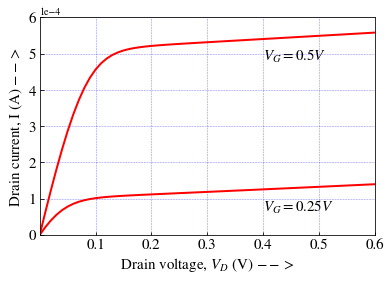

In [4]:
plot(VV,I3,'r',lw=2)
plot(VV,I4,'r',lw=2)
xlabel(' Drain voltage, $V_D$ (V) $-->$ ',fontsize=15)
ylabel(' Drain current, I (A) $-->$ ',fontsize=15)
xlim(0,0.6)
ylim(0,6e-4)
ticklabel_format(style='sci', axis='y', scilimits=(0,0))
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.1,0.7,0.1),fontsize=15)
text(0.4,4.8e-4,'$V_G=0.5V$',fontsize=15)
text(0.4,0.65e-4,'$V_G=0.25V$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 1.1.1__ (b) Drain current as a function of the drain voltage for different values of the gate voltage. </font>

***

In [5]:
%reset -f
%matplotlib inline
from pylab import *

In [6]:
E=linspace(-0.25,0.25,501); dE=E[1]-E[0]; kT=0.025; Ef=0;
V=0; mu1=Ef+(V/2); mu2=Ef-(V/2);

f1=1/(1+exp((E-mu1)/kT));
f2=1/(1+exp((E-mu2)/kT));

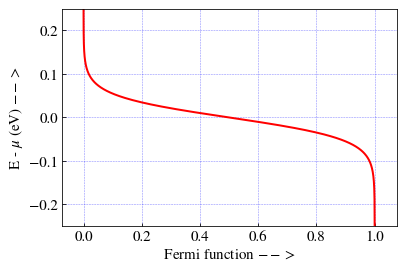

In [7]:
plot(f1,E,'r',lw=2)
xlabel(' Fermi function $-->$ ',fontsize=15)
ylabel(' E - $\mu$ (eV) $-->$ ',fontsize=15)
xlim(-0.075,1.075)
ylim(-0.25,0.25)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 1.1.3__ The Fermi function describing the number of electrons occupying a state with an energy $E$ if it is in equilibrium with a large contact (“reservoir”) having an electrochemical potential $\mu$ </font>

***

## <font color = "navy" >1.3 The quantum of conductance </font> <a id="1.3"></a>

In [8]:
%reset -f
%matplotlib inline
from pylab import *

In [9]:
E=linspace(-0.5,0.5,50001); dE=E[1]-E[0]; 
gam1=0.00001; gam2=0.05;
D1=(gam1/(2*pi))/((E**2)+((gam1/2)**2)); D2=(gam2/(2*pi))/((E**2)+((gam2/2)**2));

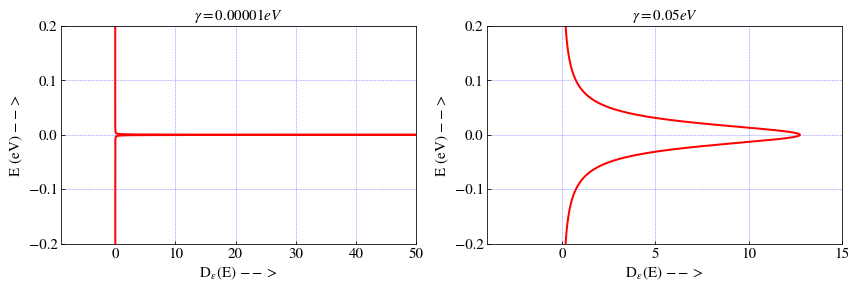

In [10]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(D1,E,'r',lw=2)
xlabel(' D$_\epsilon$(E) $-->$ ',fontsize=15)
ylabel(' E (eV) $-->$ ',fontsize=15)
xlim(-9,50)
ylim(-0.2,0.2)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('$\gamma=0.00001 eV$',fontsize=15,fontweight='bold')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(D2,E,'r',lw=2)
xlabel(' D$_\epsilon$(E) $-->$ ',fontsize=15)
ylabel(' E (eV) $-->$ ',fontsize=15)
xlim(-4,15)
ylim(-0.2,0.2)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('$\gamma=0.05 eV$',fontsize=15,fontweight='bold')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 1.3.3__ An energy level at $E = \epsilon$ is broadened into a continuous density of states $D_\epsilon$(E) by the process of coupling to the contacts. $D_\epsilon$(E) curves for two different values of coupling $\gamma$ with $\epsilon = 0 eV$ are shown. </font>

***

## <font color = "navy" >1.4 Potential profile </font> <a id="1.4"></a>

In [11]:
%reset -f
%matplotlib inline
from pylab import *

In [5]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; I0=q*q/hbar;

#Parameters
U0=0.025; kT=0.025; mu=0; ep=0.2;
g1=0.005; g2=0.005; g=g1+g2;
alphag=1; alphad=0.5;

#Energy grid
NE=501; E=linspace(-1,1,NE); dE=E[1]-E[0];
D=(g/(2*pi))/((E**2)+((g/2)**2)); #Lorentzian Density of states per eV
D=D/(dE*sum(D)); #Normalizing to one

#Bias
IV=101; VV=linspace(0,1,IV);

#Initializing arrays
N=zeros((IV)); I=zeros((IV));

for iV in range(0,IV):
    Vg=0; Vd=VV[iV]; #Vd=0; Vg=VV[iV];
    mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    U=0; #Self-consistent field
    dU=1;
    
    while dU>1e-6:
        f1=1/(1+exp((E+ep+UL+U-mu1)/kT));
        f2=1/(1+exp((E+ep+UL+U-mu2)/kT));
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*N[iV]; dU=abs(U-Unew);
        U=U+0.1*(Unew-U);
        
    I[iV]=dE*I0*(sum(D*(f1-f2)))*(g1*g2/g);

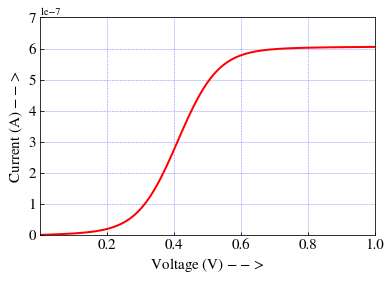

In [6]:
plot(VV,I,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Current (A) $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,7e-7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 1.4.6__ (a) Current vs. voltage calculated using the SCF method. </font>

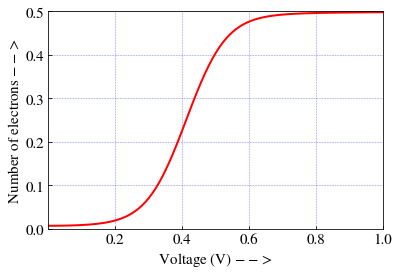

In [7]:
plot(VV,N,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Number of electrons $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,0.5)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 1.4.6__ (b) Number of electrons vs. voltage calculated using the SCF method. </font>

***

## <font color = "navy" >1.5 Coulomb blockade </font> <a id="1.5"></a>

In [ ]:
%reset -f
%matplotlib inline
from pylab import *

In [ ]:
E=linspace(-0.5,0.5,50001); dE=E[1]-E[0]; gam=0.05;
D=(gam/(2*pi))/(((E-0.25)**2)+((gam/2)**2));
D=D+((gam/(2*pi))/(((E+0.25)**2)+((gam/2)**2)));

In [ ]:
plot(D,E,'r',lw=2)
xlabel(' D(E) $-->$ ',fontsize=15)
ylabel(' E (eV) $-->$ ',fontsize=15)
xlim(0,20)
ylim(-0.5,0.5)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 1.5.2__ Under certain conditions, the up-spin and down-spin density of states splits into two parts separated by the single-electron charging energy, $U_0$, instead of one single degenerate peak. </font>

***

## <font color = "navy" >Exercises </font> <a id="1.E"></a>

In [ ]:
%reset -f
%matplotlib inline
from pylab import *

In [ ]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; I0=q*q/hbar;

#Parameters
U0=0.025; kT1=0.026; kT2=0.025; ep=0.2;
g1=0.005; g2=0.005; g=g1+g2;
alphag=1; alphad=0.5;

#Energy grid
NE=501; E=linspace(-1,1,NE); dE=E[1]-E[0];
g1=0.005*(E+abs(E))/(E+E+1e-6); #zero for negative E
g2=0.005*ones((NE)); g1=g2;
g=g1+g2;

#Bias
IV=101; VV=linspace(-0.25,0.25,IV);

#Initializing arrays
I=zeros((IV)); N=zeros((IV));

for iV in range(0,IV):
    mu1=ep+VV[iV]; mu2=mu1;
    f1=1/(1+exp((E-mu1)/kT1));
    f2=1/(1+exp((E-mu2)/kT2));
    D=(g/(2*pi))/(((E-ep)**2)+((g/2)**2));
    D=D/(dE*sum(D));
    I[iV]=dE*2*I0*(sum(D*(f1-f2)*g1*g2/g));

In [ ]:
plot(VV,I,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Current (A) $-->$ ',fontsize=15)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xlim(-0.25,0.25)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. E.1.3__ </font>

***

In [21]:
%reset -f
%matplotlib inline
from pylab import *

In [2]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; I0=q*q/hbar;

#Parameters
U0=0.025; kT=0.025; mu=0; ep=0.2; N0=0;
g1=0.005; g2=0.005; g=g1+g2;
alphag=1; alphad=0.5;

#Energy grid
NE=501; E=linspace(-1,1,NE); dE=E[1]-E[0];
g1=0.005*(E+abs(E))/(E+E+1e-6); #zero for negative E
g2=0.005*ones((NE));
g=g1+g2;

#Bias
IV=101; VV=linspace(-0.6,0.6,IV);

#Initializing arrays
N=zeros((IV)); I=zeros((IV)); 

for iV in range(0,IV):
    Vg=0; Vd=VV[iV]; #Vd=0; Vg=VV[iV];
    mu1=mu; mu2=mu1-Vd; UL=-(alphag*Vg)-(alphad*Vd);
    U=0; # Self-consistent field
    dU=1;
    
    while dU>1e-6:
        f1=1/(1+exp((E-mu1)/kT));
        f2=1/(1+exp((E-mu2)/kT));
        D=(g/(2*pi))/(((E-ep-UL-U)**2)+((g/2)**2));
        D=D/(dE*sum(D));
        N[iV]=dE*2*sum(D*((f1*g1/g)+(f2*g2/g)));
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew);
        U=U+0.1*(Unew-U);
        
    I[iV]=dE*2*I0*(sum(D*(f1-f2)*g1*g2/g));

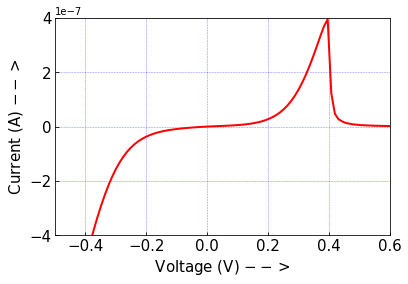

In [3]:
plot(VV,I,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Current (A) $-->$ ',fontsize=15)
xlim(-0.5,0.6)
ylim(-4e-7,4e-7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. E.1.4__ </font>

***

## _References_ </u><a id="references"></a>

<font color = "stone"><font size = "3" > 
- Datta, S. (2005). Quantum Transport: Atom to Transistor. Cambridge: Cambridge University Press. doi:10.1017/CBO9781139164313 
- Datta, S. “Fundamentals of Nanoelectronics: Basic Concepts”. MOOC offered by the Purdue University. <br>
[Online] https://courses.edx.org/courses/PurdueX/nano520/3T2015/course/
- Datta, S. “Fundamentals of Nanoelectronics, Part B: Quantum Transport”. MOOC offered by the Purdue University. <br> 
[Online] https://courses.edx.org/courses/course-v1:PurdueX+nano521x+2015_T3/course/</font>